# Reproducibility Project

## Based on Figure 2 from "Evolution of antipredator behavior in an island lizard species, Podarcis erhardii (Reptilia: Lacertidae): The sum of all fears?", Brock et. al, 2014
<a href="https://onlinelibrary.wiley.com/doi/full/10.1111/evo.12555">Publication</a>
<a href="https://datadryad.org/resource/doi:10.5061/dryad.bt52f?show=full">Datasets</a>

In [153]:
suppressMessages(library(tidyverse))
library(readxl)
options(warn=-1)

## Load the data and create a tibble with only the information we need

In [154]:
myData <- read_excel('Hierarchical Linear Model.xlsx') %>%
    select('Island name', 'Group FID mean', 'Total Number of Predators') %>%
    distinct()
myData

Island name,Group FID mean,Total Number of Predators
Naxos,193.1731,6
Naxos,275.6757,6
Mando,267.9333,3
Glaronissi,194.4000,1
Naxos,361.1111,6
Ovriokastro,178.0952,2
Gaidaronissi,139.1216,1
Makronissi,183.4783,0
Kato Fira,210.9524,4
Pano Fira,221.5385,3


## Plot the data

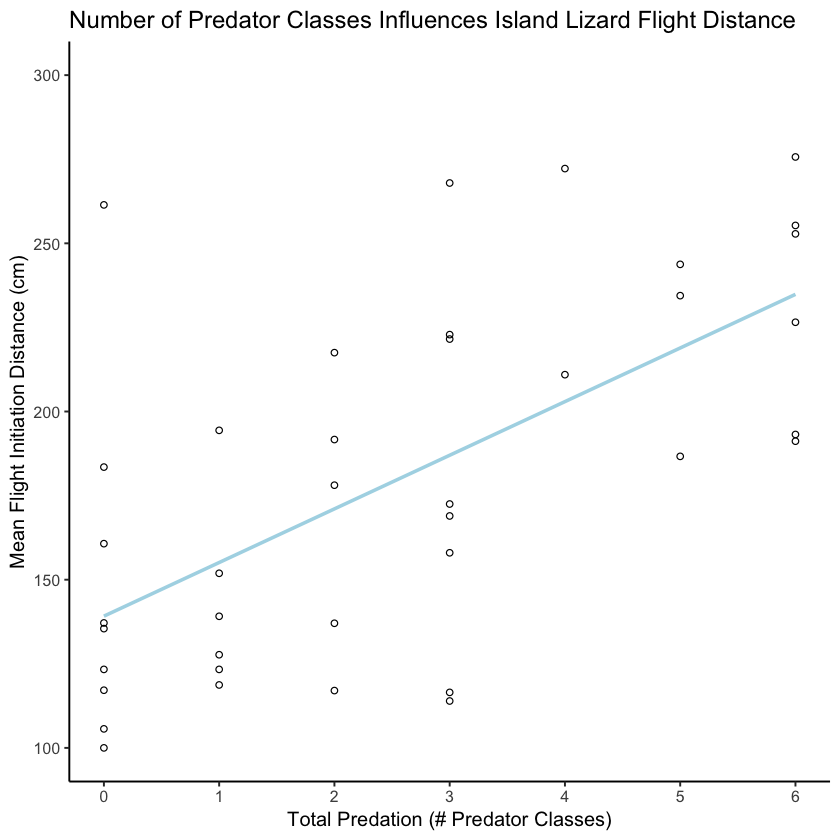

In [155]:
ggplot(myData, aes(x = `Total Number of Predators`, y = `Group FID mean`)) +
    geom_point(shape=1) +
    geom_smooth(method=lm, se=FALSE, color='lightblue', size=1) +
    scale_x_continuous(breaks = round(seq(min(myData$`Total Number of Predators`), max(myData$`Total Number of Predators`), by = 1),1)) +
    ylim(100, 300) +
    xlab("Total Predation (# Predator Classes)") +
    ylab("Mean Flight Initiation Distance (cm)") +
    ggtitle("Number of Predator Classes Influences Island Lizard Flight Distance") +
    theme_classic(base_size=12) 

<b>Figure 2</b> Scatterplot of mean flight initiation distance by total number of predator types per island. Each datapoint represents one island. Mean FID increases as predation regime intensifies (R-squared = 0.4298, P < 0.001, N = 38).

## Code for generating statistics for figure description
<b>Note: I got a different r-squared value than the authors did</b>

In [156]:
fidPredation <- select(myData, `Group FID mean`, `Total Number of Predators`)
summary.lm(lm(fidPredation))


Call:
lm(formula = fidPredation)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.094 -31.591  -1.617  25.863 125.279 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  136.149     11.554  11.784 2.95e-14 ***
`Total Number of Predators`   18.295      3.418   5.352 4.40e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.04 on 38 degrees of freedom
Multiple R-squared:  0.4298,	Adjusted R-squared:  0.4148 
F-statistic: 28.64 on 1 and 38 DF,  p-value: 4.401e-06
